<a href="https://colab.research.google.com/github/Boudia27/Projects/blob/main/project_2_Ecommerce_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Projects/project_2_Ecommerce_Dataset/data-2.csv')
print(df.head)

<bound method NDFrame.head of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerI

In [5]:
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [6]:
summary = df.describe()
print(summary)

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


# Clean DATA

In [10]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Drop rows with missing values
df.dropna(inplace=True)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Convert data types if needed
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Remove outliers
numeric_columns = ['Quantity', 'UnitPrice']
z_scores = np.abs(stats.zscore(df[numeric_columns]))
threshold = 3
df = df[(z_scores < threshold).all(axis=1)]

# Standardize or normalize numerical variables
df[numeric_columns] = (df[numeric_columns] - df[numeric_columns].mean()) / df[numeric_columns].std()

# - Handle inconsistent or incorrect values

# Verify the cleaned dataset
print("Cleaned Dataset:\n", df.head())

Missing Values:
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
Cleaned Dataset:
   InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER -0.187179   
1    536365     71053                  WHITE METAL LANTERN -0.187179   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER -0.121038   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE -0.187179   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART. -0.187179   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00  -0.098503     17850.0  United Kingdom  
1 2010-12-01 08:26:00   0.091631     17850.0  United Kingdom  
2 2010-12-01 08:26:00  -0.053233     17850.0  United Kingdom  
3 2010-12-01 08:26:00   0.091631     17850.0  United Kingdom  
4 2010-12-01 08:26:00   0.091631     17850.0  United Kingdom  


In [11]:
# Example: Replace negative Quantity values with their absolute values
df['Quantity'] = df['Quantity'].abs()

# Verify the cleaned dataset
print("Cleaned Dataset:\n", df.head())

Cleaned Dataset:
   InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER  0.187179   
1    536365     71053                  WHITE METAL LANTERN  0.187179   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER  0.121038   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE  0.187179   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.  0.187179   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00  -0.098503     17850.0  United Kingdom  
1 2010-12-01 08:26:00   0.091631     17850.0  United Kingdom  
2 2010-12-01 08:26:00  -0.053233     17850.0  United Kingdom  
3 2010-12-01 08:26:00   0.091631     17850.0  United Kingdom  
4 2010-12-01 08:26:00   0.091631     17850.0  United Kingdom  


# Transformation: Standardization

In [6]:
# Transformation: Standardization
numeric_columns = ['Quantity', 'UnitPrice']
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Transformation: Normalization
# Example 1: Min-Max Normalization
min_max_scaler = MinMaxScaler()
df['Quantity'] = min_max_scaler.fit_transform(df['Quantity'].values.reshape(-1, 1))

# Transformation: Encoding categorical variables
categorical_columns = ['Country']
label_encoder = LabelEncoder()
df[categorical_columns] = df[categorical_columns].apply(label_encoder.fit_transform)

# Verify the transformed dataset
print("Transformed Dataset:\n", df.head())

Transformed Dataset:
   InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER  0.500037   
1    536365     71053                  WHITE METAL LANTERN  0.500037   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER  0.500049   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE  0.500037   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.  0.500037   

      InvoiceDate  UnitPrice  CustomerID  Country  
0  12/1/2010 8:26  -0.021301     17850.0       36  
1  12/1/2010 8:26  -0.012620     17850.0       36  
2  12/1/2010 8:26  -0.019234     17850.0       36  
3  12/1/2010 8:26  -0.012620     17850.0       36  
4  12/1/2010 8:26  -0.012620     17850.0       36  


# # Calculate central measures

In [20]:
# Calculate central measures for numerical variables
numeric_columns = ['Quantity', 'UnitPrice']

# Mean
mean_values = df[numeric_columns].mean()
print("Mean:")
print(mean_values)

# Median
median_values = df[numeric_columns].median()
print("Median:")
print(median_values)

# Mode
mode_values = df[numeric_columns].mode().iloc[0]
print("Mode:")
print(mode_values)

Mean:
Quantity     5.000590e-01
UnitPrice   -1.402968e-18
dtype: float64
Median:
Quantity     0.500019
UnitPrice   -0.026159
dtype: float64
Mode:
Quantity     0.500006
UnitPrice   -0.034737
Name: 0, dtype: float64


# Dispersion measures

In [21]:
# Calculate dispersion measures for numerical variables
numeric_columns = ['Quantity', 'UnitPrice']

# Standard Deviation
std_values = df[numeric_columns].std()
print("Standard Deviation:")
print(std_values)

# Variance
variance_values = df[numeric_columns].var()
print("Variance:")
print(variance_values)

# Range
range_values = df[numeric_columns].max() - df[numeric_columns].min()
print("Range:")
print(range_values)

Standard Deviation:
Quantity     0.001346
UnitPrice    1.000001
dtype: float64
Variance:
Quantity     0.000002
UnitPrice    1.000002
dtype: float64
Range:
Quantity       1.000000
UnitPrice    517.075053
dtype: float64


# Calculate mean, standard deviation, and median for numerical variables

In [22]:
# Calculate mean, standard deviation, and median for numerical variables
numeric_columns = ['Quantity', 'UnitPrice']

# Mean
mean_values = df[numeric_columns].mean()
print("Mean:")
print(mean_values)

# Standard Deviation
std_values = df[numeric_columns].std()
print("Standard Deviation:")
print(std_values)

# Median
median_values = df[numeric_columns].median()
print("Median:")
print(median_values)

Mean:
Quantity     5.000590e-01
UnitPrice   -1.402968e-18
dtype: float64
Standard Deviation:
Quantity     0.001346
UnitPrice    1.000001
dtype: float64
Median:
Quantity     0.500019
UnitPrice   -0.026159
dtype: float64


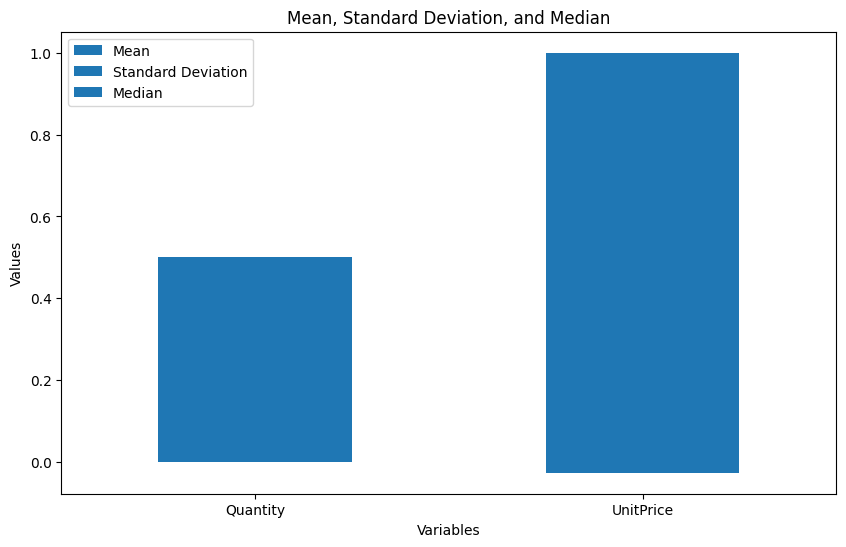

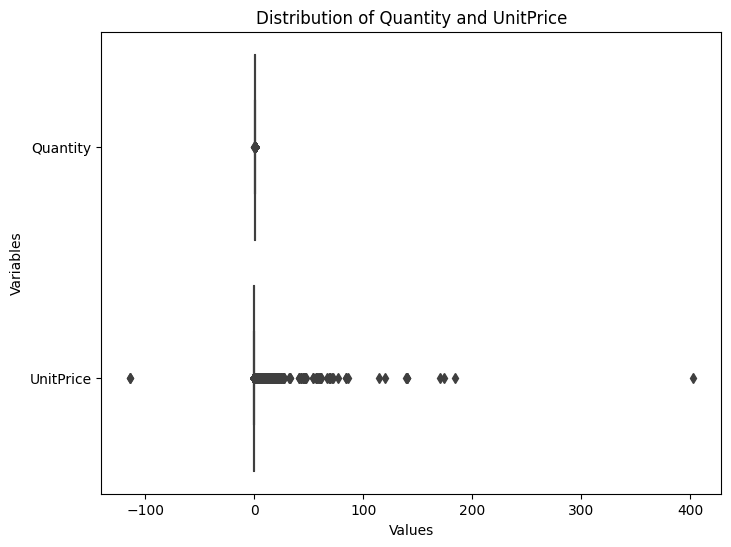

In [24]:
# Calculate mean, standard deviation, and median for numerical variables
numeric_columns = ['Quantity', 'UnitPrice']

mean_values = df[numeric_columns].mean()
std_values = df[numeric_columns].std()
median_values = df[numeric_columns].median()

# Data Visualization: Bar Plot
plt.figure(figsize=(10, 6))
mean_values.plot(kind='bar', label='Mean')
std_values.plot(kind='bar', label='Standard Deviation')
median_values.plot(kind='bar', label='Median')

plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Mean, Standard Deviation, and Median')
plt.legend()
plt.xticks(rotation=0)
plt.show()

# Data Visualization: Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[numeric_columns], orient='h')
plt.xlabel('Values')
plt.ylabel('Variables')
plt.title('Distribution of Quantity and UnitPrice')
plt.show()

# Data Visualization

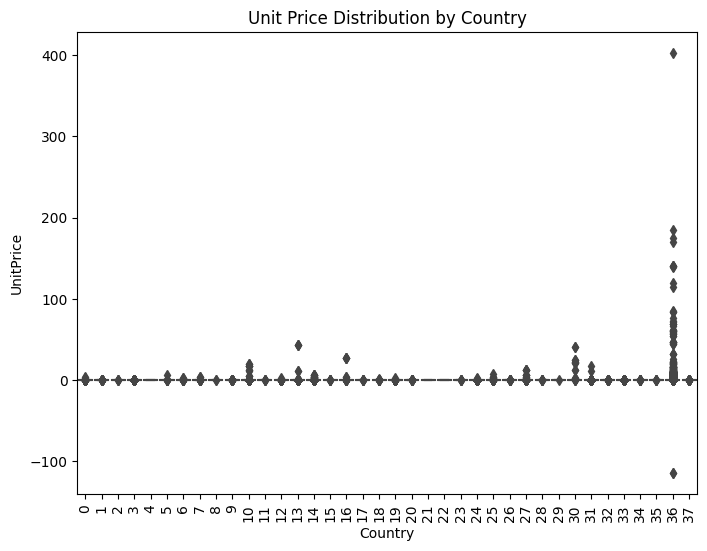

In [11]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Country', y='UnitPrice', data=df)
plt.xlabel('Country')
plt.ylabel('UnitPrice')
plt.title('Unit Price Distribution by Country')
plt.xticks(rotation=90)
plt.show()


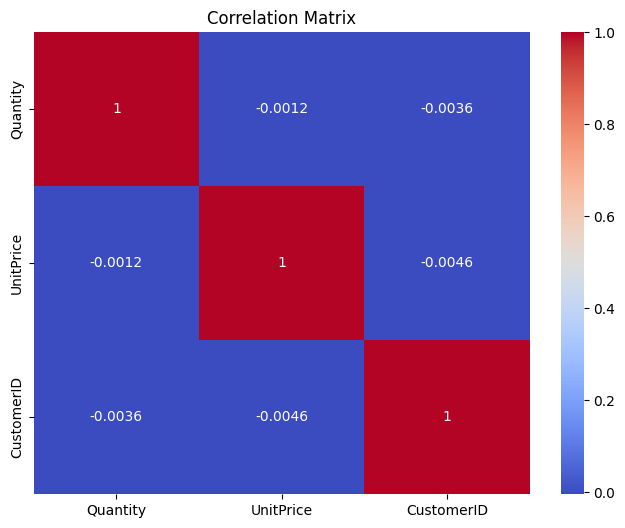

In [12]:
# Heatmap
correlation_matrix = df[['Quantity', 'UnitPrice', 'CustomerID']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

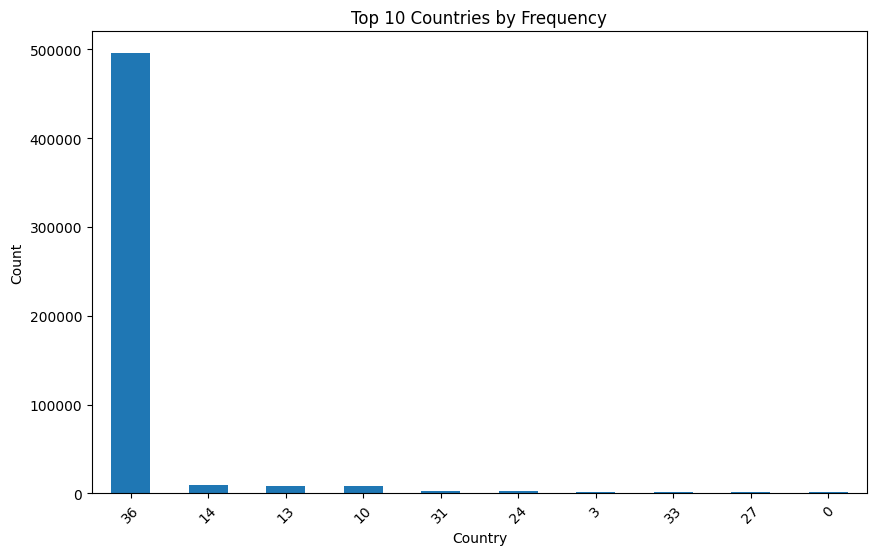

In [16]:
# Count the occurrences of each country
country_counts = df['Country'].value_counts()

# Select the top N most common countries to visualize
top_countries = country_counts.head(10)

# Data Visualization: Bar Plot
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries by Frequency')
plt.xticks(rotation=45)
plt.show()


In [17]:
# Get the unique descriptions
unique_descriptions = df['Description'].unique()

# Print the unique descriptions
for description in unique_descriptions:
    print(description)

WHITE HANGING HEART T-LIGHT HOLDER
WHITE METAL LANTERN
CREAM CUPID HEARTS COAT HANGER
KNITTED UNION FLAG HOT WATER BOTTLE
RED WOOLLY HOTTIE WHITE HEART.
SET 7 BABUSHKA NESTING BOXES
GLASS STAR FROSTED T-LIGHT HOLDER
HAND WARMER UNION JACK
HAND WARMER RED POLKA DOT
ASSORTED COLOUR BIRD ORNAMENT
POPPY'S PLAYHOUSE BEDROOM 
POPPY'S PLAYHOUSE KITCHEN
FELTCRAFT PRINCESS CHARLOTTE DOLL
IVORY KNITTED MUG COSY 
BOX OF 6 ASSORTED COLOUR TEASPOONS
BOX OF VINTAGE JIGSAW BLOCKS 
BOX OF VINTAGE ALPHABET BLOCKS
HOME BUILDING BLOCK WORD
LOVE BUILDING BLOCK WORD
RECIPE BOX WITH METAL HEART
DOORMAT NEW ENGLAND
JAM MAKING SET WITH JARS
RED COAT RACK PARIS FASHION
YELLOW COAT RACK PARIS FASHION
BLUE COAT RACK PARIS FASHION
BATH BUILDING BLOCK WORD
ALARM CLOCK BAKELIKE PINK
ALARM CLOCK BAKELIKE RED 
ALARM CLOCK BAKELIKE GREEN
PANDA AND BUNNIES STICKER SHEET
STARS GIFT TAPE 
INFLATABLE POLITICAL GLOBE 
VINTAGE HEADS AND TAILS CARD GAME 
SET/2 RED RETROSPOT TEA TOWELS 
ROUND SNACK BOXES SET OF4 WOODLAND 
SPA

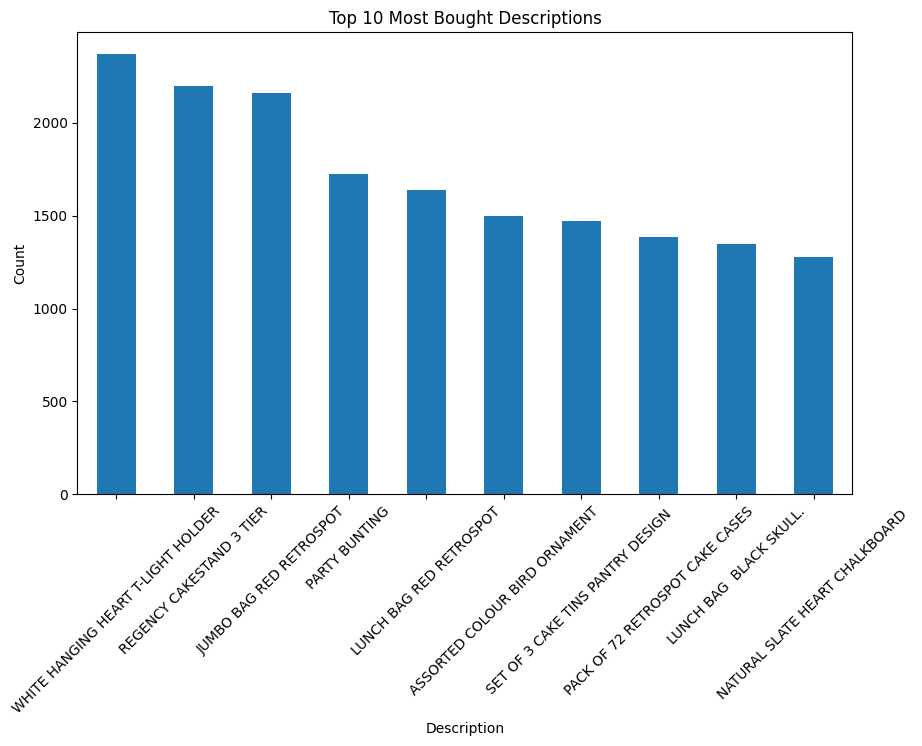

In [18]:
# Count the occurrences of each description
description_counts = df['Description'].value_counts()

# Select the top N most common descriptions to visualize
top_descriptions = description_counts.head(10)

# Data Visualization: Bar Plot
plt.figure(figsize=(10, 6))
top_descriptions.plot(kind='bar')
plt.xlabel('Description')
plt.ylabel('Count')
plt.title('Top 10 Most Bought Descriptions')
plt.xticks(rotation=45)
plt.show()

# Hypothesis

#### Null hypothesis (H0): There is no significant difference in the average unit price across different countries.
#### Alternative hypothesis (H1): There is a significant difference in the average unit price across different countries.

# One-way ANOVA

In [25]:
# Extract relevant data for the ANOVA test
countries = df['Country'].unique()
grouped_data = [df[df['Country'] == country]['UnitPrice'] for country in countries]

# Perform the one-way ANOVA
f_statistic, p_value = stats.f_oneway(*grouped_data)

# Interpret the results
alpha = 0.05  # significance level
print("One-way ANOVA results:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

One-way ANOVA results:
F-statistic: 8.707501848418975
p-value: 3.5817635058736703e-47
Reject the null hypothesis


# Visualization ANOVA

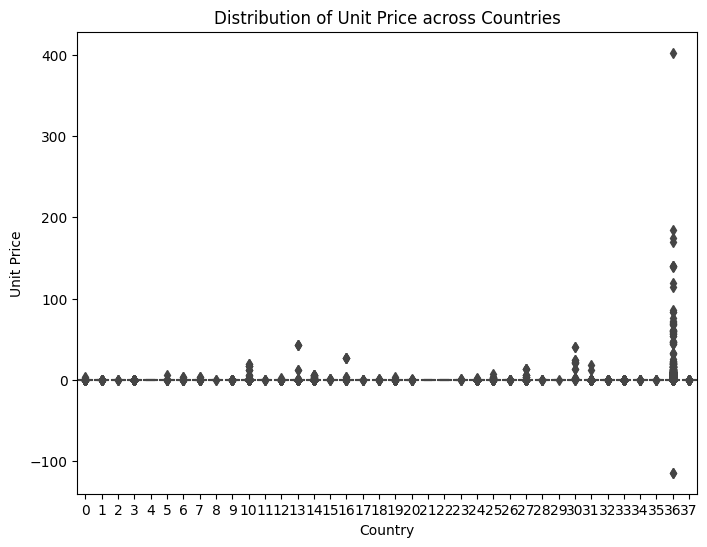

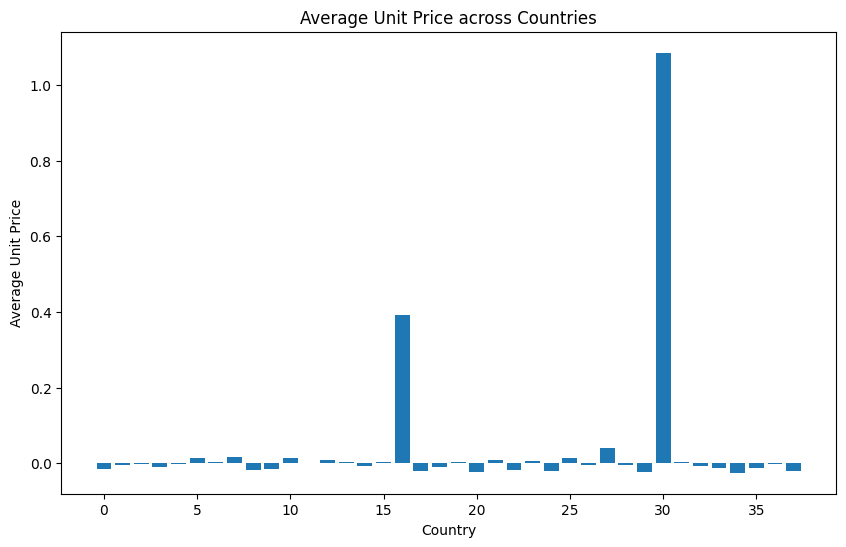

One-way ANOVA results:
F-statistic: 8.707501848418975
p-value: 3.5817635058736703e-47
Reject the null hypothesis


In [26]:
# Extract relevant data for the ANOVA test
countries = df['Country'].unique()
grouped_data = [df[df['Country'] == country]['UnitPrice'] for country in countries]

# Perform the one-way ANOVA
f_statistic, p_value = stats.f_oneway(*grouped_data)

# Visualize the results using box plots
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Country'], y=df['UnitPrice'])
plt.xlabel('Country')
plt.ylabel('Unit Price')
plt.title('Distribution of Unit Price across Countries')
plt.show()

# Visualize the results using bar plots
plt.figure(figsize=(10, 6))
plt.bar(countries, [data.mean() for data in grouped_data])
plt.xlabel('Country')
plt.ylabel('Average Unit Price')
plt.title('Average Unit Price across Countries')
plt.show()

# Print the ANOVA results
alpha = 0.05  # significance level
print("One-way ANOVA results:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Based on the results of the one-way ANOVA test, the F-statistic is 8.7075 and the p-value is 3.5818e-47. Since the p-value is significantly smaller than the chosen significance level of 0.05, we reject the null hypothesis. This indicates that there is a significant difference in the average unit price across different countries.

The findings of this analysis suggest that the country variable has a statistically significant impact on the unit prices in the dataset. This information can be valuable for various purposes, such as pricing strategies, market analysis, and identifying countries with higher or lower price ranges.